In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Data uploading

In [2]:
AIRPORT_ICAO = "ESSA"

RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# WIF
rwy_metrics_WIF_horizontal_PIs_by_hour_df_list = [] # list of lists

# TIF
rwy_metrics_TIF_horizontal_PIs_by_hour_df_list = [] # list of lists

i = 0
for runway in RUNWAYS:
    rwy_metrics_WIF_horizontal_PIs_by_hour_df_list.append([])
    rwy_metrics_TIF_horizontal_PIs_by_hour_df_list.append([])

    for cluster in CLUSTERS:
        filename = AIRPORT_ICAO + "_metrics_WIF_horizontal_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_WIF_horizontal_PIs_by_hour_df_list[i].append(temp_df)

        filename = AIRPORT_ICAO + "_metrics_TIF_horizontal_PIs_by_hour_rwy" + runway + "_cluster" + str(cluster) + ".csv"
        full_filename = os.path.join(DATA_DIR, filename)
        temp_df = pd.read_csv(full_filename, sep=' ')
        rwy_metrics_TIF_horizontal_PIs_by_hour_df_list[i].append(temp_df)

    i = i+1

# Average Additional Distance

## Medians of Average Additional Distance in TMA vs TIF

0.04
0.75
0.00
0.60
0.82
0.01
0.63
0.12
0.92
0.70
0.75
0.43
0.87
0.71
0.91
0.65
0.95
0.68
0.74
0.48
0.79
0.88
0.89
0.79
0.06
0.94
0.89
0.92
0.97
0.90
0.91
0.73
0.84
0.78
0.20
0.89


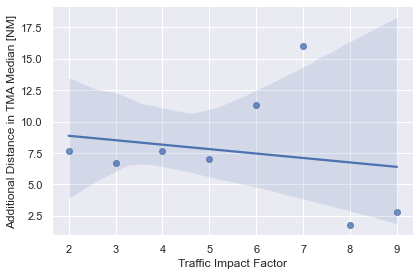

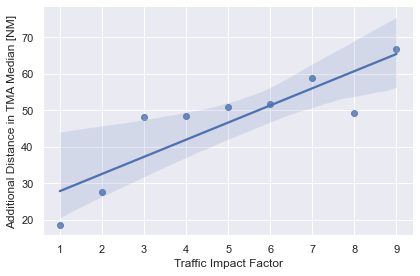

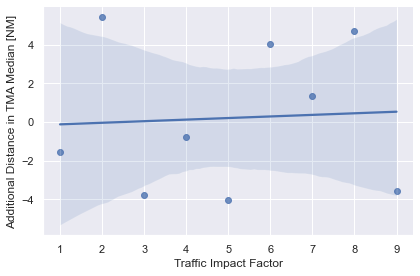

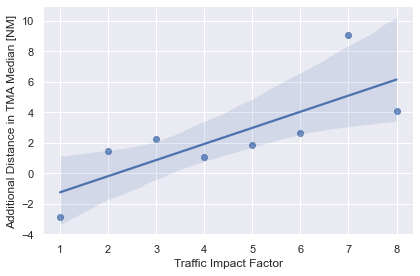

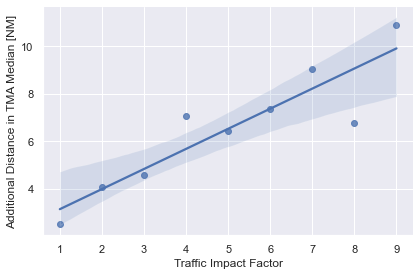

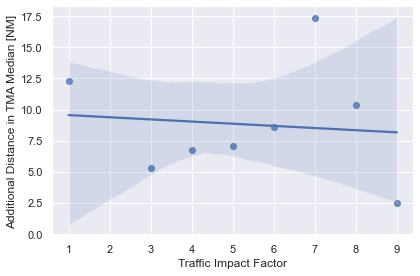

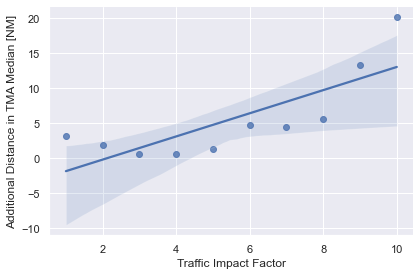

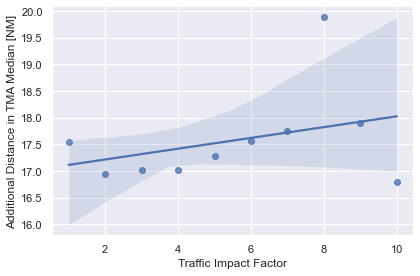

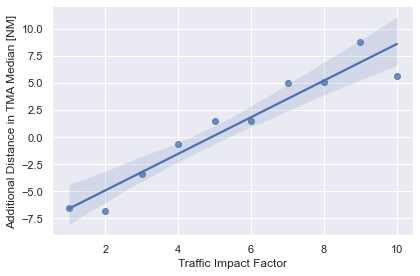

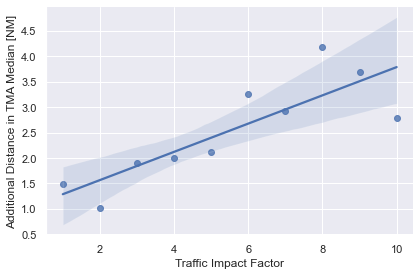

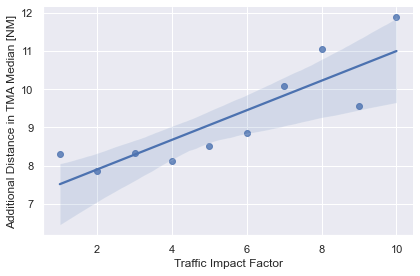

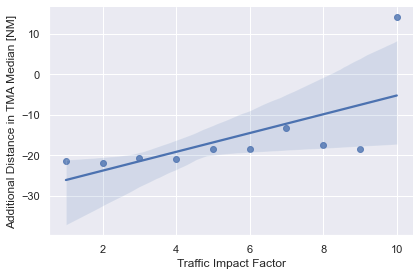

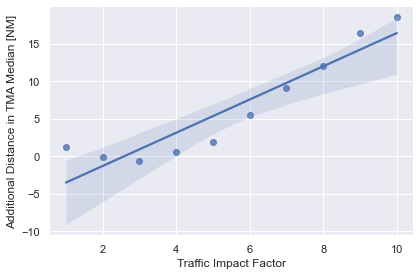

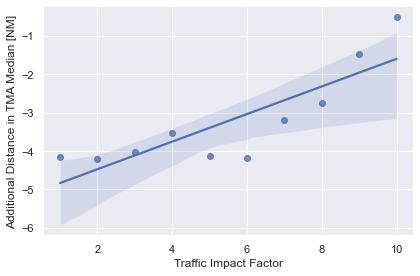

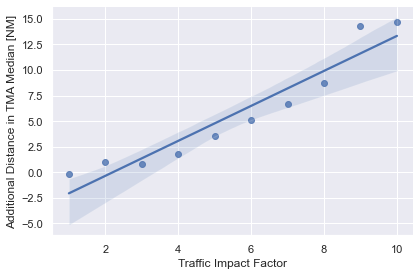

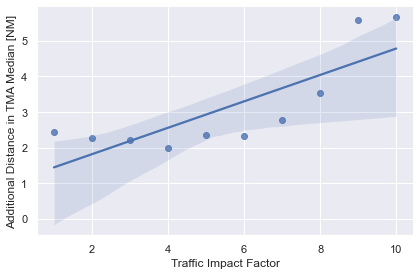

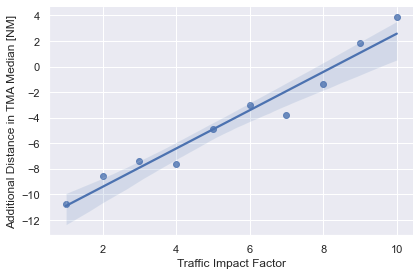

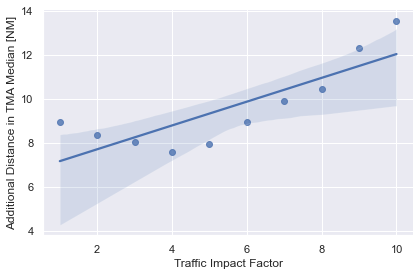

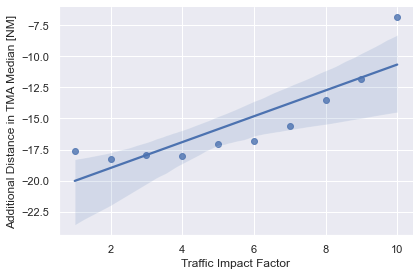

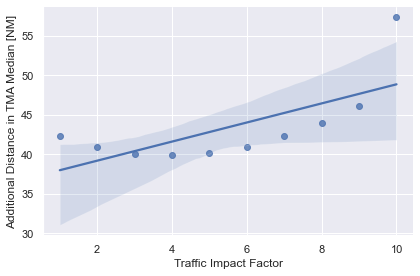

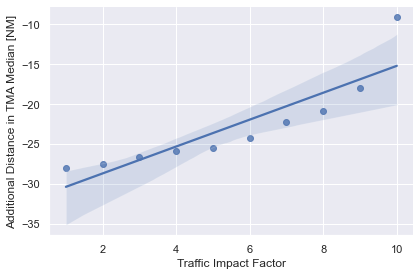

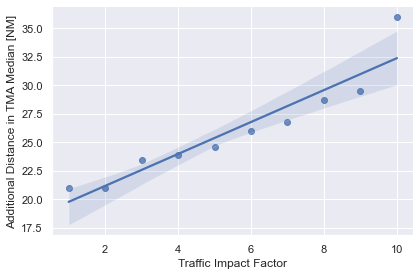

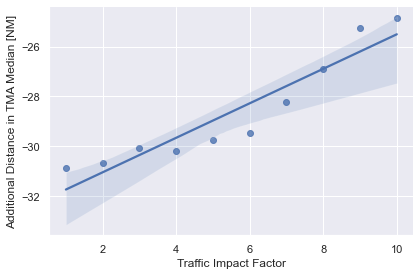

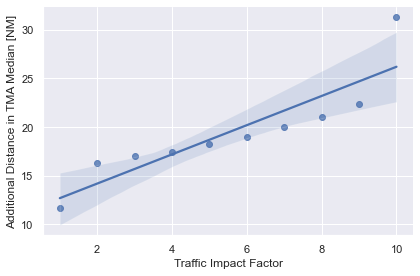

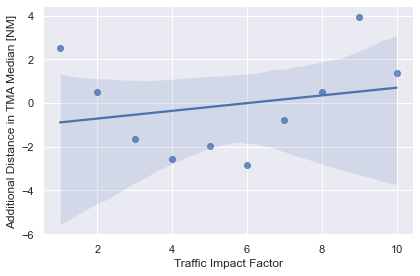

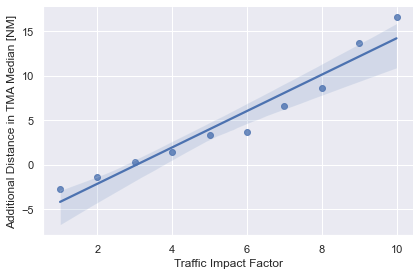

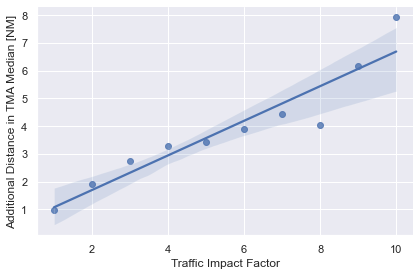

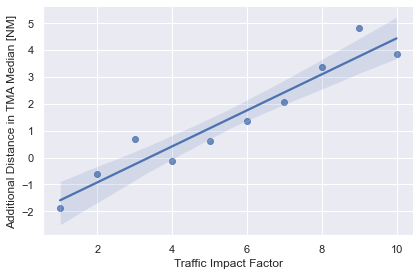

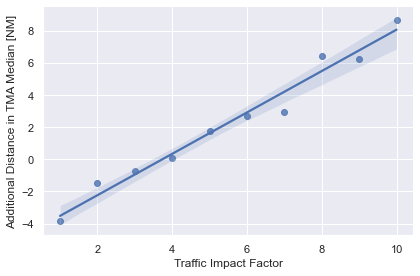

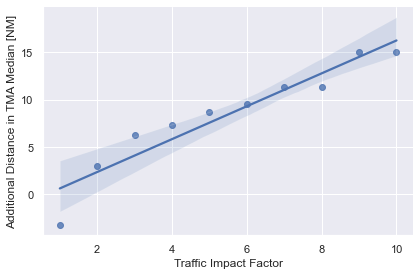

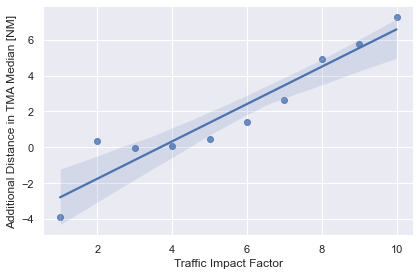

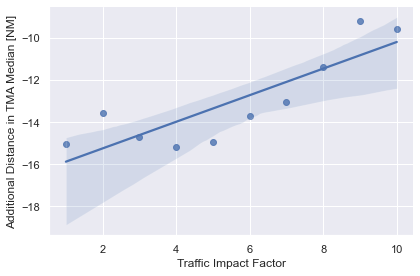

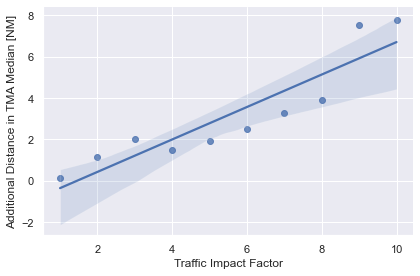

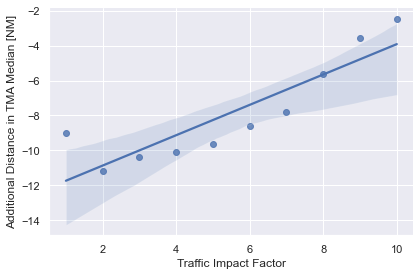

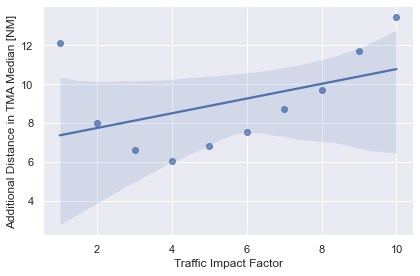

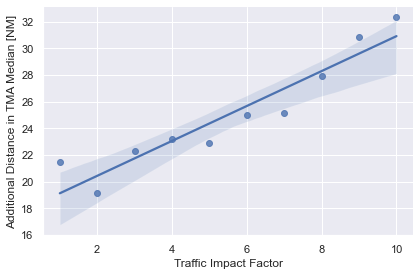

In [3]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_TIF_horizontal_PIs_by_hour_df_list[i][cluster-1].copy()
        df = df[df['numberOfFlights']>0]
        #print(df.head())
        #p1 = df["distanceChangePercentMean"].quantile(0.05)
        #p2 = df["distanceChangePercentMean"].quantile(0.95)
        #df = df.loc[(df['distanceChangePercentMean'] > p1) & (df['distanceChangePercentMean'] < p2) ]

        df.set_index(['TIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['TIF', 'addDistanceMedian'])

        for idx, group in df.groupby(level='TIF'):
    
            #idx_df = group['distanceChangePercentMean']
            idx_df = group['additionalDistanceMean']
    
            idx_median = np.median(idx_df)
            median_df = median_df.append({'TIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

        median_df['TIF'] = median_df['TIF'].astype(np.float)
        median_df['addDistanceMedian'] = median_df['addDistanceMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='TIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Traffic Impact Factor')
        plt.ylabel('Additional Distance in TMA Median [NM]')
        #plt.ylabel('Additional Distance in TMA Median [%]')
        
        fig_name = "Figures\AddDistanceVsTIF\AddDistanceVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        #fig_name = "Figures\AddDistancePercentVsTIF\AddDistancePercentVsTIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        plt.savefig(fig_name)

        #statsmodel:
        X_df = median_df[['TIF']]
        y_df = median_df[['addDistanceMedian']]

        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        #print(est2.summary())
        rsquare = est2.rsquared
        #print(f"R-suare is {rsquare:.2f}")
        print(f"{rsquare:.2f}")
        # with outliers - ESGG: 0.84, ESSA: 0.93
        # without outliers - ESGG: 0.86, ESSA: 0.93

## Medians of Average Additional Distance in TMA vs WIF

0.87
0.07
0.78
0.00
0.15
0.02
0.10
0.26
0.38
0.30
0.45
0.30
0.16
0.50
0.04
0.32
0.33
0.43
0.03
0.54
0.34
0.10
0.01
0.79
0.02
0.31
0.76
0.64
0.59
0.44
0.01
0.20
0.70
0.08
0.20
0.36


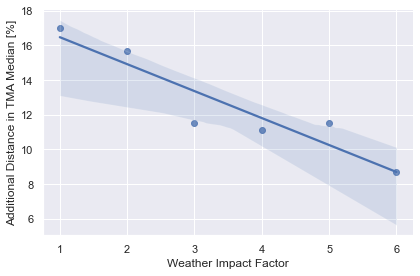

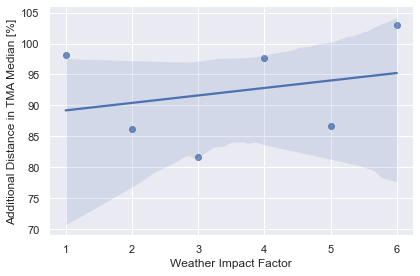

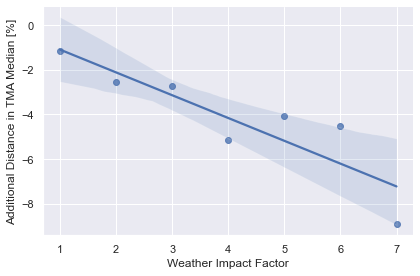

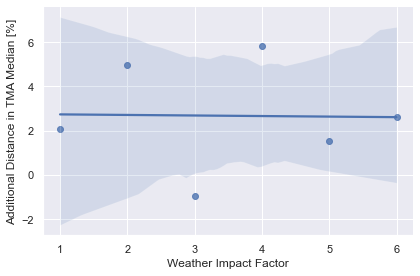

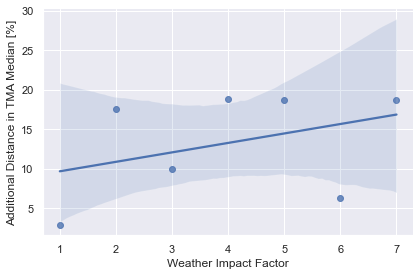

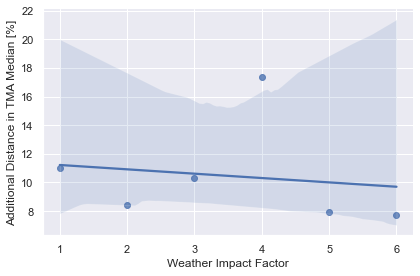

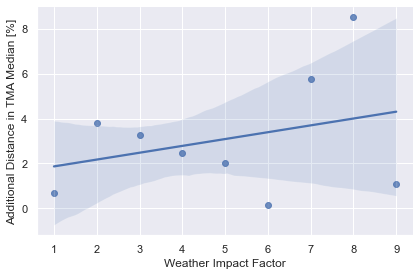

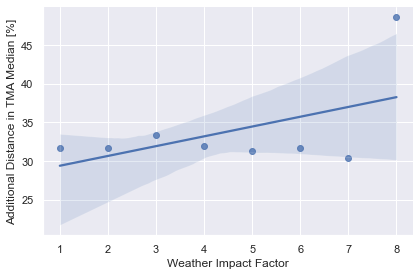

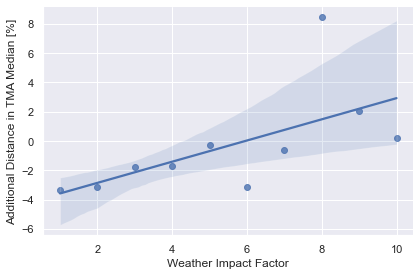

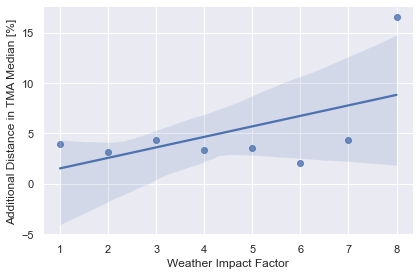

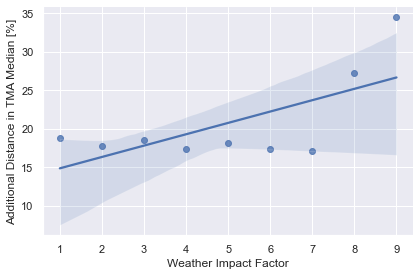

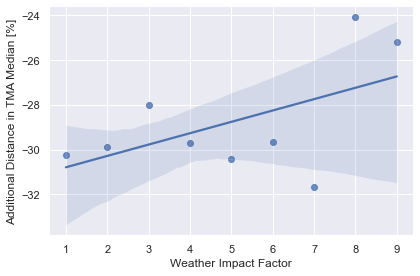

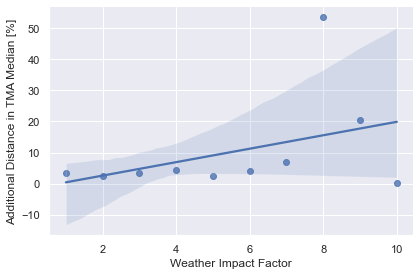

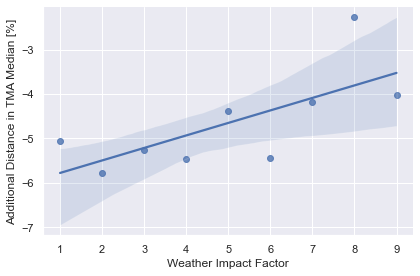

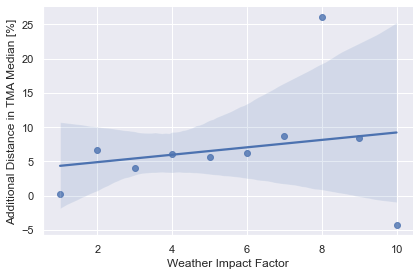

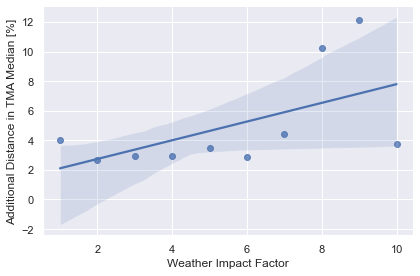

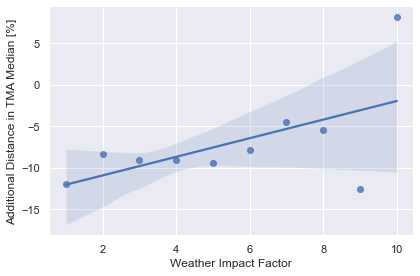

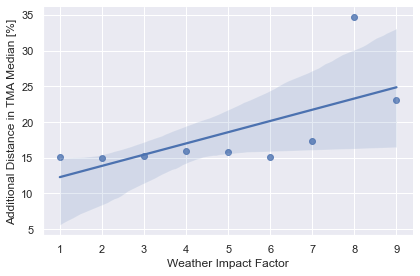

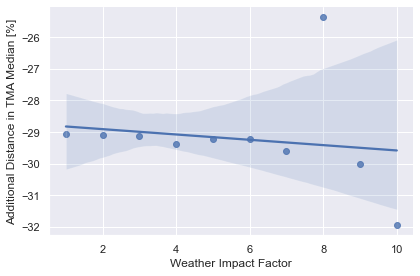

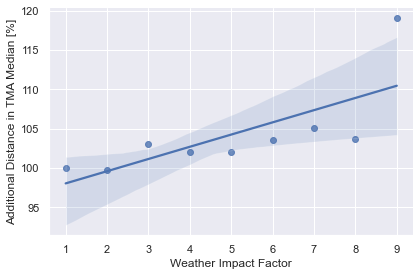

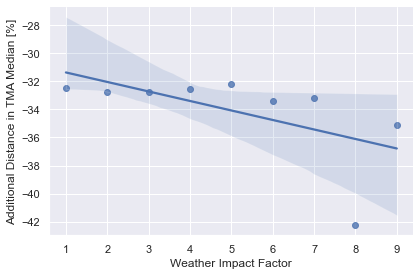

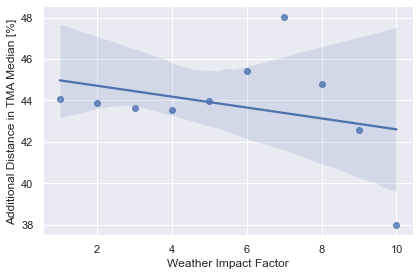

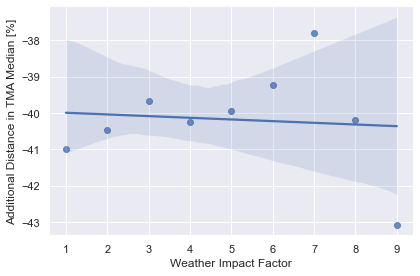

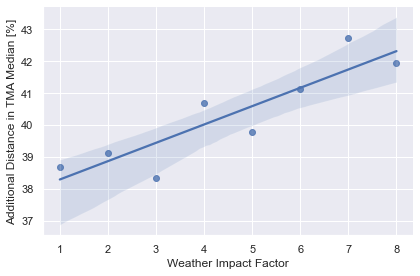

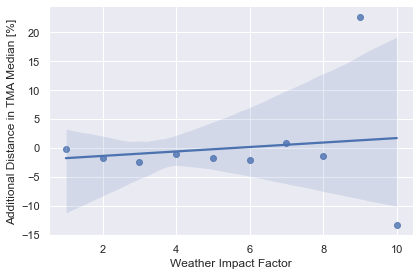

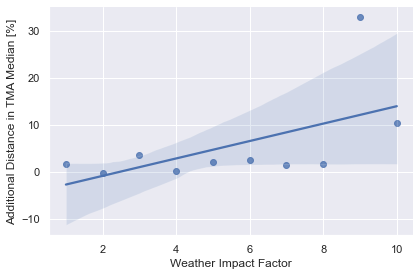

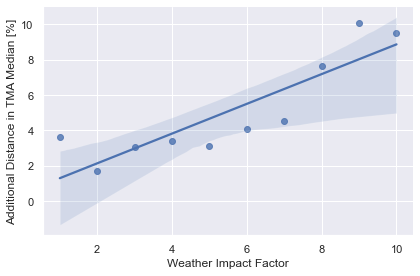

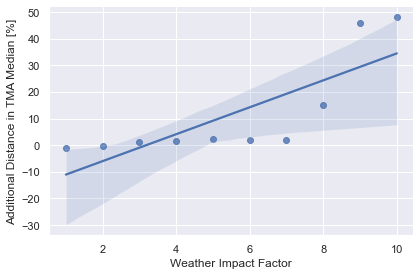

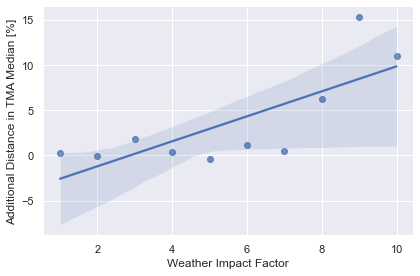

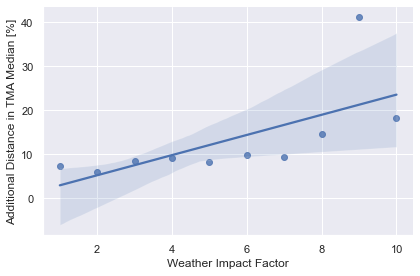

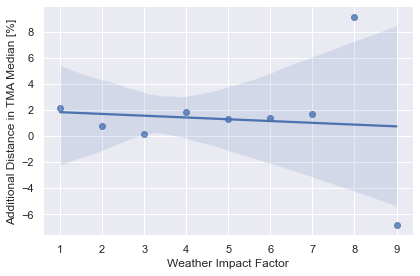

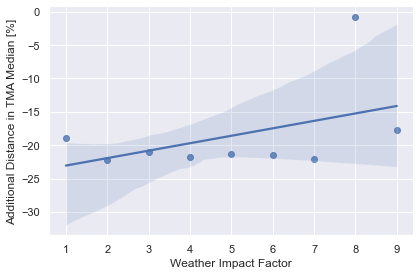

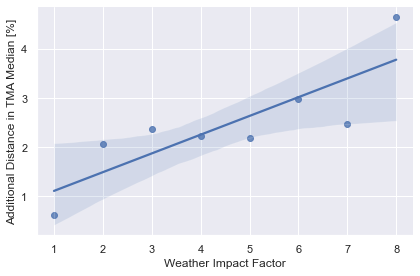

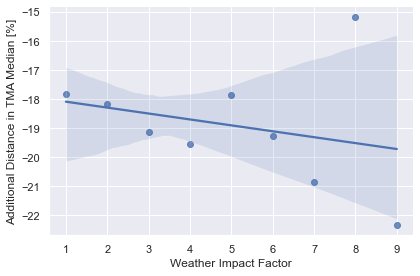

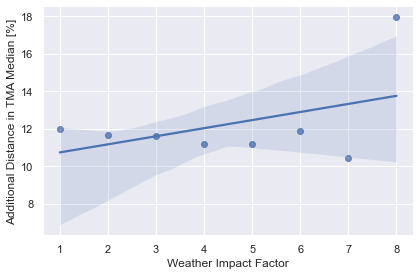

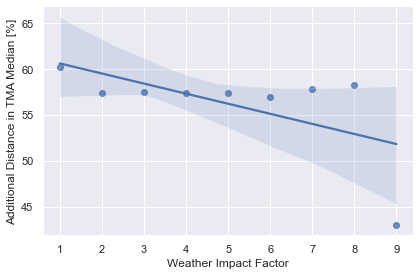

In [7]:
RUNWAYS = ['08', '01L', '01R', '26', '19R', '19L']
CLUSTERS = [1,2,3,4,5,6]

i = -1
for runway in RUNWAYS:
    i = i+1
    for cluster in CLUSTERS:
        df = rwy_metrics_WIF_horizontal_PIs_by_hour_df_list[i][cluster-1].copy()

        df.dropna(inplace=True)
        df = df[df['numberOfFlights']>0]
        #p1 = df["distanceChangePercentMean"].quantile(0.05)
        #p2 = df["distanceChangePercentMean"].quantile(0.95)
        #df = df.loc[(df['distanceChangePercentMean'] > p1) & (df['distanceChangePercentMean'] < p2) ]

        df.set_index(['WIF'], inplace=True)
        df.sort_index(inplace=True)

        median_df = pd.DataFrame(columns=['WIF', 'addDistanceMedian'])

        for idx, group in df.groupby(level='WIF'):
    
            idx_df = group['distanceChangePercentMean']
            #idx_df = group['additionalDistanceMean']

            idx_median = np.median(idx_df)
            
            median_df = median_df.append({'WIF': idx, 'addDistanceMedian': idx_median}, ignore_index=True)

        
        median_df['WIF'] = median_df['WIF'].astype(np.float)
        median_df['addDistanceMedian'] = median_df['addDistanceMedian'].astype(np.float)
        
        sns.set(rc={'figure.figsize':(1,1)})

        sns.lmplot(x='WIF',y='addDistanceMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
        plt.xlabel('Weather Impact Factor')
        #plt.ylabel('Additional Distance in TMA Median [NM]')
        plt.ylabel('Additional Distance in TMA Median [%]')
        
        #fig_name = "Figures\AddDistanceVsWIF\AddDistanceVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"
        fig_name = "Figures\AddDistancePercentVsWIF\AddDistancePercentVsWIF_runway" + runway + "_cluster" + str(cluster) + ".png"

        plt.savefig(fig_name)
        
        #statsmodel:
        #median_df = median_df[median_df['WIF']<10]
        X_df = median_df[['WIF']]
        y_df = median_df[['addDistanceMedian']]
        
        X2 = sm.add_constant(X_df.values)
        est = sm.OLS(y_df, X2)
        est2 = est.fit()
        #print(est2.summary()) 
        rsquare = est2.rsquared
        #print(f"R-suare is {rsquare:.2f}")
        print(f"{rsquare:.2f}")
        # with outliers - ESGG: 0.49 ESSA: 0.61
        # without outliers - ESGG: 0.18 ESSA: 0.18